In [30]:
import pandas as pd
import numpy as np
import datetime 
import re
from urlextract import URLExtract
import spacy
import time
import pickle
import matplotlib.pyplot as plt


In [2]:
extractor = URLExtract()
def replace_urls(x):
    urls = extractor.find_urls(x)
    if urls:
        x_new = replace_urls(x.replace(urls[0],''))
        return x_new
    else:
        return x

In [3]:
mh_df2 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_04/data/mh_rand_large2.csv', low_memory=False)
mh_df =  pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_04/data/mh_rand_large.csv', low_memory=False)

depression2 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_04/data/depression_rand_large2.csv', low_memory=False)
depression = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_04/data/depression_rand_large.csv', low_memory=False)

mh_df2.drop(columns=['Unnamed: 0'], inplace=True)
mh_df.drop(columns=['Unnamed: 0'], inplace=True)

depression2.drop(columns=['Unnamed: 0'], inplace=True)
depression.drop(columns=['Unnamed: 0'], inplace=True)

mh_df2['date'] = mh_df2.created_utc.apply(lambda x: pd.to_datetime(time.ctime(x)))
mh_df['date'] = mh_df.created_utc.apply(lambda x: pd.to_datetime(time.ctime(x)))

depression2['date'] = depression2.created_utc.apply(lambda x: pd.to_datetime(time.ctime(x)))
depression['date'] = depression.created_utc.apply(lambda x: pd.to_datetime(time.ctime(x)))

mh_df2.drop_duplicates(subset=['id'], inplace=True)
mh_df.drop_duplicates(subset=['id'], inplace=True)

depression2.drop_duplicates(subset=['id'], inplace=True)
depression.drop_duplicates(subset=['id'], inplace=True)



In [94]:
df_full = pd.concat([mh_df, mh_df2, depression, depression2])
# df_full.columns.to_list()

['all_awardings',
 'allow_live_comments',
 'author',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_text',
 'author_flair_type',
 'author_fullname',
 'author_patreon_flair',
 'awarders',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gildings',
 'id',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_richtext',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'permalink',
 'pinned',
 'retrieved_on',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'steward_reports',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_subscribers',
 'subreddit_type',
 'thumbnail',
 'title',
 'total_awards_received',
 'updated_utc',
 'url',
 'crosspost_parent',
 'crosspost_parent_list',
 'link_flair_css_class',
 'link_flair_template_id',

In [5]:
# df_full[df_full.date < '2020-10-20']
# df_full[df_full.date < '2020-03']

<AxesSubplot:xlabel='date,date'>

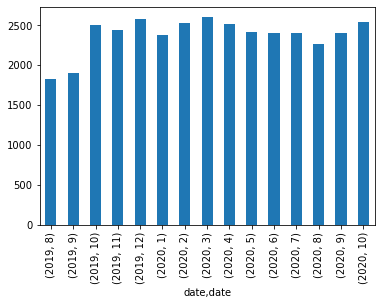

In [107]:
df_full.groupby([df_full["date"].dt.year, df_full["date"].dt.month]).size().plot(kind="bar")

In [7]:
# remove indents and urls and double spaces
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub('\n',' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub('  ',' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: replace_urls(x))

cols_of_interest = ['date', 'id', 'author', 'subreddit', 'title', 'selftext']
df_full_clean = df_full[(df_full.selftext != '[removed]') & (df_full.selftext != '[deleted]')].copy()
df_full_clean[cols_of_interest]

,date,id,author,subreddit,title,selftext
0,2019-10-11 16:39:05,dglq7k,liznormal23,mentalhealth,Mental Health Gray Area. Please help.,*TRIGGER WARNING: EATING DISORDER AND SUBSTANC...
1,2019-10-11 16:34:59,dgloc1,tacobean87,mentalhealth,what’s wrong with me ?,every single time i read something my mind blu...
2,2019-10-11 16:22:09,dglieu,AquilaVI,mentalhealth,I'm trying to deal with a deadly car crash. (A...,"Hello, people! A little backstory. I'll try to..."
3,2019-10-11 16:18:16,dglgl6,Mrcoolbaby,mentalhealth,Overwhelmed,I feel like my life is on loop. All the same k...
4,2019-10-11 16:15:26,dglfcf,TheA55M4N,mentalhealth,Anxiety and obsessions,I wrote my story here
...,...,...,...,...,...,...
2095,2019-09-13 02:52:49,d3lxwm,tjmac411,depression,Need guidance,I started dating this girl about a month ago a...
2096,2019-09-13 02:47:28,d3lw9v,entry-level-job,depression,All companies I interview for that then reject...,It's frustrating that I want to work but I'm n...
2097,2019-09-13 02:41:17,d3lujy,lonelysadboii,depression,What’s the point of my existence?,"I’m a disappointment to my parents and family,..."
2098,2019-09-13 02:39:59,d3lu5k,Soulscreame,depression,All that my depression is. A theory of cowardi...,Warning! This is kinda long! If theres anythin...


In [108]:
stop_words = ['feel',
 'want',
 'myself',
 'people',
 'help',
 'depression',
 'nan',
 'fucking',
 'mental',
 'hate',
 'health',
 'life',
 'need',
 'anxiety',
 'talk',
 'anymore',
 'die',
 'depressed',
 'friends',
 'fuck',
 'feeling',
 'kill',
 'time',
 'shit',
 'tired',
 'happy',
 'better',
 'things',
 'going',
 'bad',
 'way',
 'care',
 'good',
 'wish',
 'person',
 'sad',
 'day',
 'makes',
 'years',
 'right',
 'tell',
 'self',
 'worse',
 'try',
 'thoughts',
 'live',
 'friend',
 'stop',
'feel',
 'help',
 'nan',
 'people',
 'need',
 'fucking',
 'hate',
 'myself',
 'talk',
 'mental',
 'health',
 'depressed',
 'fuck',
 'shit',
 'self',
 'person',
 'makes',
 'friends',
 'feeling',
 'better',
 'depression',
 'wanna',
 'sad',
 'good',
 'way',
 'try',
 'understand',
 'wrong',
 'lonely',
 'advice',
 'find',
 'care',
 'feelings',
 'idk',
 'emotions',
 'bad',
 'issues',
 'talking',
 'stupid',
 'actually',
 'ask',
 'like',
 'right',
 'thoughts',
 'guilty',
 'illness',
 'life',
 'therapy',
 'things',
 'social','best', 'bit', 'lot', 'great', 'says', 'getting', 'numb', 'come', 'amp', 'thing', 'little', 'today', 'started', 'maybe', 'feels', 'feel', 'feeling',
"told", 'tomorrow', 'everyday', 'future', 'reason', 'pay', 'got', 'said', 'everyday', 'tomorrow', 'week', 'old', 'start', 'anxious', 'able', 'tried', 'features']
              
              
              
              

In [111]:
path = '/Users/collinswestnedge/programming/Metis_Online/project_04/pickles/'

with open(path+'stop_words5.pickle', 'wb') as file:
    pickle.dump(set(stop_words), file)

In [112]:
with open(path+'stop_words5.pickle', 'rb') as file:
    stop_words = pickle.load(file)

In [113]:
class NLPPipe:
    
    def __init__(self, vectorizer, tokenizer, disable, pos, lemma=False):
        
        self.vectorizer = vectorizer
        self.tokenize = tokenizer
        self.disable = disable
        self.pos_list = pos
        self.lemma = lemma
    
    def process_text(self, text):

        nlp = spacy.load("en_core_web_sm")
        nlp.Defaults.stop_words |= stop_words
#         nlp.vocab["myself"].is_stop = False
        nlp.vocab[" "].is_stop = True
        nlp.vocab["like"].is_stop = True
        nlp.vocab["think"].is_stop = True
        nlp.vocab["know"].is_stop = True
        nlp.Defaults.stop_words |= stop_words

        text_full = [] 
        for doc in nlp.pipe(text, disable=self.disable):
            # if part of speech list isnt empty return matches for pos
            if self.pos_list:
                tokens = [(ent.text) for ent in doc if not ent.is_stop and not ent.is_punct and ent.pos_ in self.pos_list]
                cleaned_text = " ".join(tokens)
                text_full.append(cleaned_text)
            elif self.lemma == True:
                tokens = [(ent.lemma_) for ent in doc if not ent.is_stop and not ent.is_punct]
                cleaned_text = " ".join(tokens)
                text_full.append(cleaned_text)
            else:
                tokens = [(ent.text) for ent in doc if not ent.is_stop and not ent.is_punct]
                cleaned_text = " ".join(tokens)
                text_full.append(cleaned_text)

        return text_full
    
    def fit(self, text):
        clean_text = self.process_text(text)
        return self.vectorizer.fit(clean_text)
    
    def transform(self, text):
        clean_text = self.process_text(text)
        return self.vectorizer.transform(clean_text)
    
    def fit_transform(self, text):
        clean_text = self.process_text(text)
        return self.vectorizer.fit_transform(clean_text)
    
    def save_pipe(self, filename):
        """
        Writes the attributes of the pipeline to a file
        allowing a pipeline to be loaded later with the
        pre-trained pieces in place.
        """
        if type(filename) != str:
            raise TypeError("filename must be a string")
        pickle.dump(self.__dict__, open(filename+".mdl", 'wb'))
        
    def load_pipe(self, filename):
        """
        Writes the attributes of the pipeline to a file
        allowing a pipeline to be loaded later with the
        pre-trained pieces in place.
        """
        if type(filename) != str:
            raise TypeError("filename must be a string")
        if filename[-4:] != '.mdl':
            filename += '.mdl'
        self.__dict__ = pickle.load(open(filename, 'rb'))

In [ ]:
# corpus = df_full_clean[['title','selftext']].sample(1)
# corpus.title.values[0]

In [15]:
# def process_text(text, pos_list, lemma=False):

#     nlp = spacy.load("en_core_web_sm")
# #     nlp.vocab["myself"].is_stop = False
#     nlp.vocab[" "].is_stop = True
# #     nlp.vocab["like"].is_stop = True
# #     nlp.vocab["think"].is_stop = True
# #     nlp.vocab["know"].is_stop = True
#     nlp.Defaults.stop_words |= stop_words


#     text_full = [] 
#     for doc in nlp.pipe(text, disable=['parser', 'ner']):
#         # if part of speech list isnt empty return matches for pos
#         if pos_list:
#             tokens = [(ent.pos_) for ent in doc if not ent.is_stop and not ent.is_punct and ent.pos_ in pos_list]
#             cleaned_text = " ".join(tokens)
#             text_full.append(cleaned_text)
#         elif lemma == True:
#             tokens = [(ent.lemma_) for ent in doc if not ent.is_stop and not ent.is_punct]
#             cleaned_text = " ".join(tokens)
#             text_full.append(cleaned_text)
#         else:
#             tokens = [(ent.text) for ent in doc if not ent.is_stop and not ent.is_punct]
#             cleaned_text = " ".join(tokens)
#             text_full.append(cleaned_text)
            
#     return text_full

# # print(corpus.title.values[0])
# # print()

# a = process_text(['abandon', 'abandoned', 'abandonment', 'running', 'ran', 'runs'], pos_list=[], lemma=False)
# a

In [16]:
df_full_clean['text_title'] = df_full_clean.title + ' ' + df_full_clean.selftext

In [52]:
pre_covid_corpus = df_full_clean[df_full_clean.date < '2020-02-5'].text_title
post_covid_corpus = df_full_clean[df_full_clean.date > '2020-02-5'].text_title

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

# corpus = df_full_clean.selftext
corpus = df_full_clean.text_title



tfdif_vect = TfidfVectorizer(
                             min_df = 5,
                             ngram_range=(1, 1),
                             max_df = .5, 
                             token_pattern = r'\b[a-zA-Z]{3,}\b'
                             )

pipeline = NLPPipe(vectorizer=tfdif_vect,
                  tokenizer=None,
                  disable=["tagger","parser", "ner"],
                  pos=[],
#                   pos=['NOUN', 'ADJ', 'PROPN'],
                  lemma=True)

#PROPN

word_vect = pipeline.fit_transform(corpus).toarray()

In [115]:
df = pd.DataFrame(word_vect)
df.columns = pipeline.vectorizer.get_feature_names()
df

,aback,abandon,abandoned,abandonment,abc,abchecken,abdomen,abdominal,abhor,abhorrent,...,zen,zero,ziemlich,zoloft,zombie,zone,zoo,zoom,zopiclone,zyprexa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
lsa = TruncatedSVD(10, random_state=0)
topic_mat = lsa.fit_transform(word_vect)
lsa.explained_variance_ratio_

In [ ]:
topic_word = pd.DataFrame(lsa.components_,
                          index=['topic_'+str(i) for i in range(10)],
                          columns=pipeline.vectorizer.get_feature_names())

top_words = topic_word.median(axis=0).sort_values(ascending=False).head(50).index.to_list()



In [ ]:
top_words

In [ ]:
topic_word['aback'].values

In [ ]:
import matplotlib.pyplot as plt
for word in top_words:
    plt.title(word)
    plt.bar(topic_word[word].index, topic_word[word].values)
    plt.xticks(rotation=90)
    plt.show()

In [22]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [23]:
# display_topics(lsa, pipeline.vectorizer.get_feature_names(), 100)

In [24]:
def plot_topics(topic_model, topic, num_words=20):
    
    num_topics = topic_model.components_.shape[0]
    
    topic_word = pd.DataFrame(topic_model.components_,
                              index=['topic_'+str(i) for i in range(num_topics)],
                              columns=pipeline.vectorizer.get_feature_names())

    topics_df = topic_word.T
    top_words = topics_df['topic_'+str(topic)].sort_values(ascending=False)
    top_words[0:20]

    fig = px.bar(y=top_words[0:num_words].index,
                 x=top_words[0:num_words].values,
                 orientation='h',
                 width=500,
                 height=1000)
    fig.show()

In [25]:
# plot_topics(lsa, topic=4, num_words=40)

In [144]:
nmf = NMF(13, alpha=.1, l1_ratio=.5, random_state=0, max_iter=500)
doc_topic = nmf.fit_transform(word_vect)

In [100]:
topic_word = pd.DataFrame(nmf.components_,
                              index=['topic_'+str(i) for i in range(12)],
                              columns=pipeline.vectorizer.get_feature_names())


In [101]:
high_median_words = topic_word.median(axis=0).sort_values(ascending=False).head(25).index.to_list()

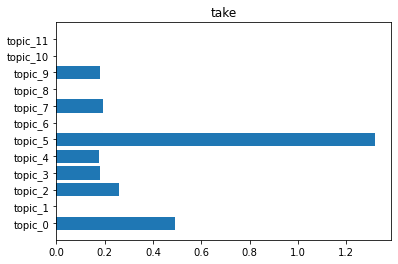

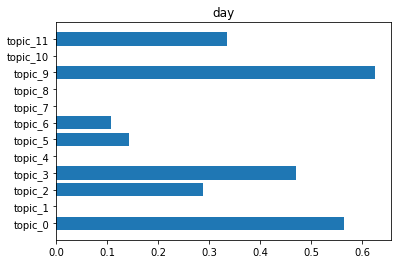

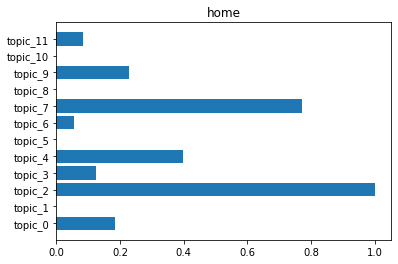

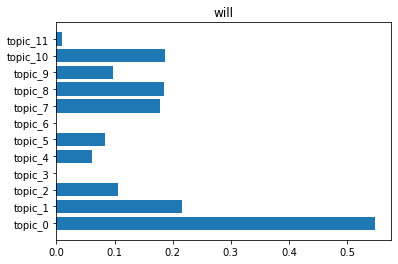

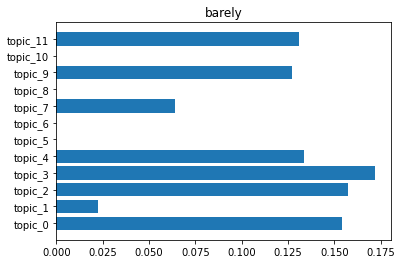

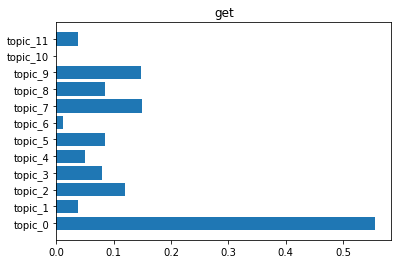

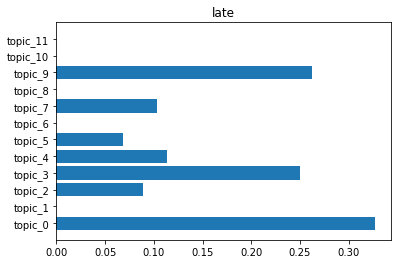

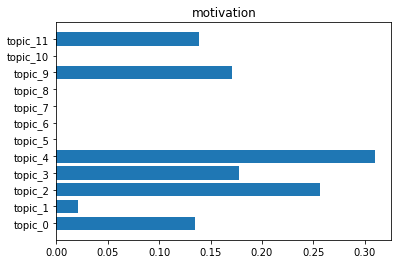

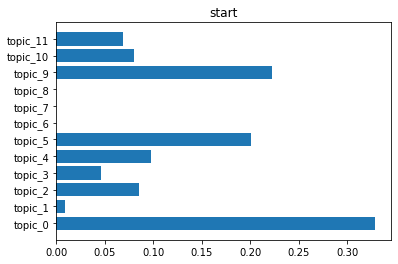

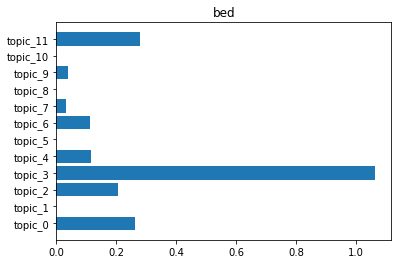

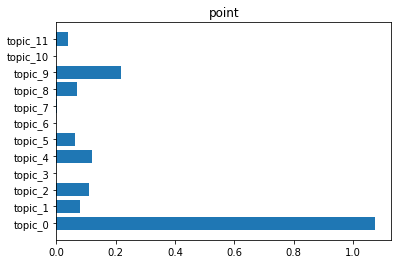

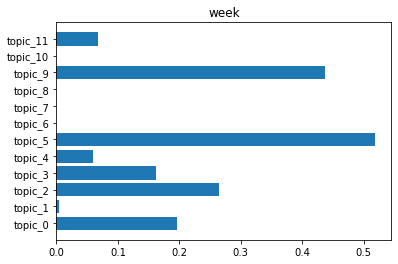

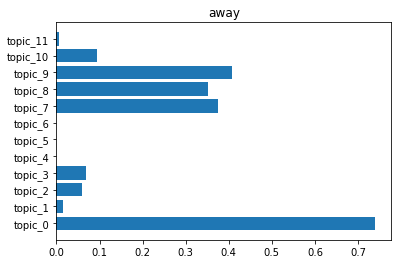

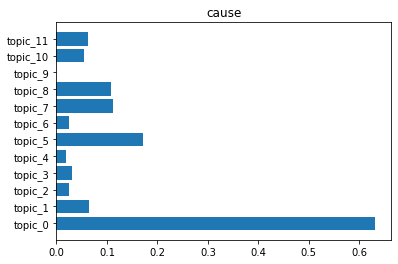

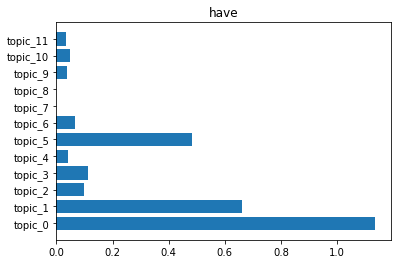

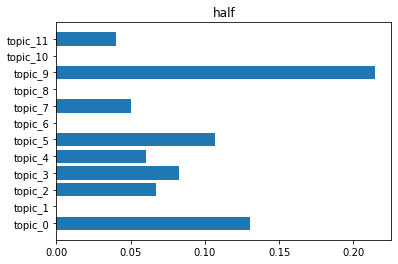

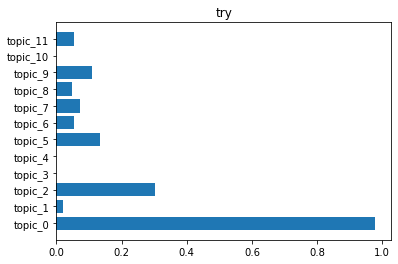

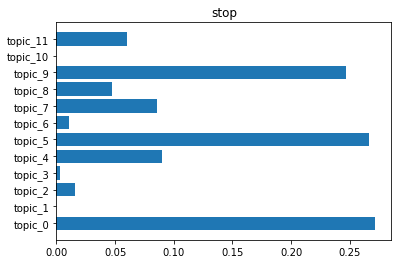

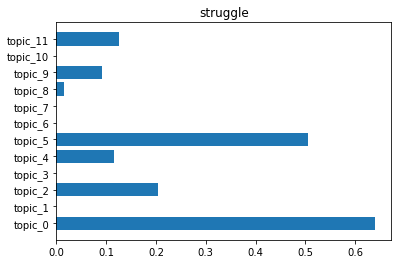

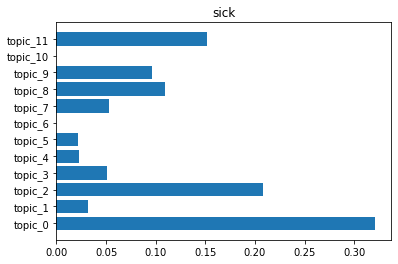

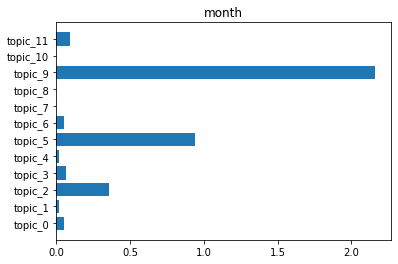

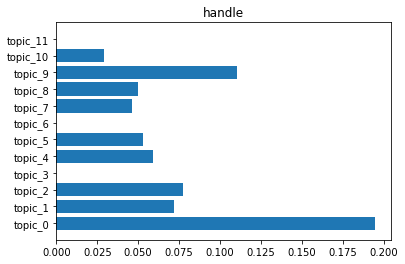

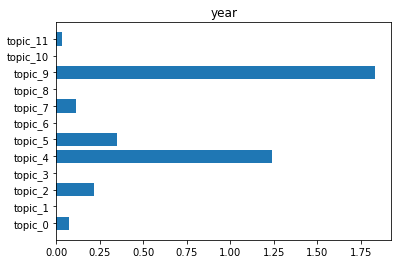

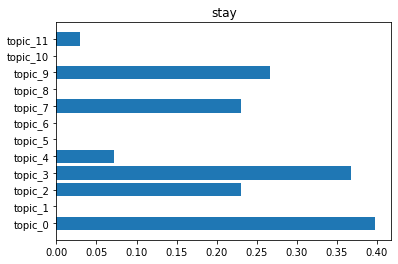

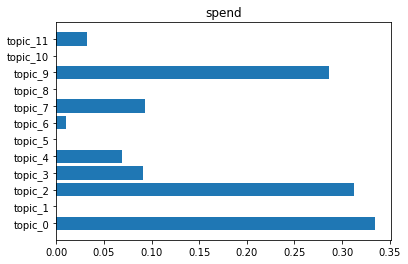

In [103]:
for word in high_median_words:
    plt.title(word)
    plt.barh(topic_word[word].index, topic_word[word].values)
#     plt.savefig(word+'.pdf')
#     plt.xticks(rotation=90)
    plt.show()

In [145]:
display_topics(nmf, pipeline.vectorizer.get_feature_names(), 150)


Topic  0
long, look, happen, end, want, hard, feel, point, lose, relationship, try, leave, post, month, away, problem, break, come, let, family, have, world, hope, year, day, mind, mean, know, sure, past, time, live, guy, change, read, okay, ago, close, girl, place, remember, deal, head, struggle, pretty, normal, sorry, write, real, kind, guess, probably, take, love, see, get, will, give, matt, make, meet, completely, cause, believe, moment, ask, situation, experience, play, stuff, hear, find, recently, new, constantly, stay, realize, keep, different, worry, honestly, turn, girlfriend, care, watch, help, need, idea, enjoy, boyfriend, thank, say, spend, listen, suffer, tell, brain, word, fall, couple, sense, lie, bring, big, interest, face, game, finally, fight, late, date, share, fear, drink, literally, weird, speak, control, etc, open, forget, start, far, support, cut, usually, state, fact, inside, night, sit, nice, stick, video, act, hang, afraid, fine, hold, push, reach, extremely,

In [ ]:
# "told", 'tomorrow', 'everyday', 'future', 'reason', 'pay', 'got', 'said', 'everyday', 'tomorrow', 'week', 'old', 'start', 'anxious', 'able', 'tried', 'features'

In [42]:
# plot_topics(nmf, topic=9, num_words=50)

In [39]:
# lda = LatentDirichletAllocation(n_components=10, random_state=0)
# lda.fit(word_vect)

In [38]:
# import pickle

# path = '/Users/collinswestnedge/programming/Metis_Online/project_04/pickles/'

# with open(path+'idk.pickle', 'wb') as file:
#     pickle.dump(nmf, file)
#     pickle.dump(word_vect, file)
#     pickle.dump(pipeline.vectorizer, file)

In [35]:
with open(path+'best_topic_model.pickle', 'rb') as file:
    nmf2 = pickle.load(file)
    word_vec2 = pickle.load(file)
    vectorizer = pickle.load(file)

In [ ]:
# import pyLDAvis
# import pyLDAvis.sklearn
# pyLDAvis.enable_notebook()

# pyLDAvis.sklearn.prepare(lda, np.matrix(word_vect), pipeline.vectorizer, mds='mmds')